# Life Expectancy with Linear Regression and Python

We will use the kaggle data that was collected until 2015 to predict the life expectancy of SADC coutries.

We will then use data from 2016 onwards to test the accuracy and precision of our learning model.

<u>__First__</u> let's import relevant libraries and then have a look at the <a href="https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who">data</a>

In [79]:
import pandas as pd
import numpy as np
data = pd.read_csv('WHO Life Expectancy/Life Expectancy Data.csv')

In [80]:
data.keys()

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [81]:
X_ = pd.DataFrame(data)

In [82]:
botswana = X_.loc[336:351].copy()
mauritius = X_.loc[1667:1682].copy()
seychelles = X_.loc[2281:2296].copy()
south_africa = X_.loc[2393:2408].copy()

<h3>Let's Analyse South African Statistics, with its counterpart, Botswana</h3>

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

south_africa.keys()

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

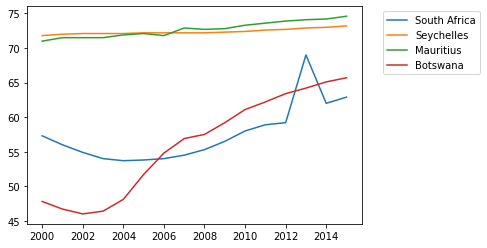

In [84]:
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='South Africa')
plt.plot(seychelles['Year'],seychelles['Life expectancy '],label='Seychelles')
plt.plot(mauritius['Year'],mauritius['Life expectancy '],label='Mauritius')
plt.plot(botswana['Year'],botswana['Life expectancy '],label='Botswana')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

The dramatic increase and subsequent decrease for South Africa between 2012 and 2014 seem very unlikely.
We will interpolate linearly and then make the correction.

In [85]:
south_africa['Life expectancy '][2395] = np.nan

<ipython-input-85-139bae63943f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_africa['Life expectancy '][2395] = np.nan


In [86]:
south_africa['Life expectancy '].interpolate(method='linear',inplace=True)

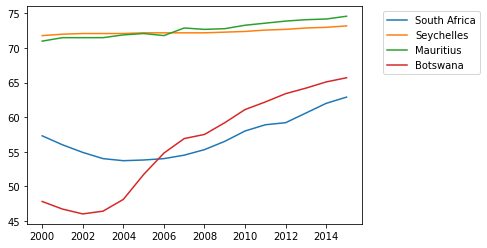

In [87]:
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='South Africa')
plt.plot(seychelles['Year'],seychelles['Life expectancy '],label='Seychelles')
plt.plot(mauritius['Year'],mauritius['Life expectancy '],label='Mauritius')
plt.plot(botswana['Year'],botswana['Life expectancy '],label='Botswana')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

Perfect.

Let us now anylyse <u>Adult Mortality</u> of South Africa and its counterparts.

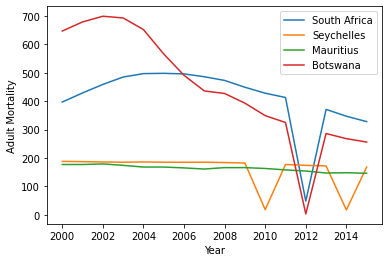

In [88]:
plt.plot(south_africa['Year'],south_africa['Adult Mortality'],label='South Africa')
plt.plot(seychelles['Year'],seychelles['Adult Mortality'],label='Seychelles')
plt.plot(mauritius['Year'],mauritius['Adult Mortality'],label='Mauritius')
plt.plot(botswana['Year'],botswana['Adult Mortality'],label='Botswana')
plt.xlabel('Year')
plt.ylabel('Adult Mortality')
plt.legend()
plt.show()

We will use the same interpolation method to make a correction for South Africa and Botswana's Adult Mortality for 2012. Imputing the data might be a good option but this is my first Data Science project and I will try the long route first.

We will now focus only on these two coutries because they are similar in per capita indicators and also conveniently, neighbours.

In [89]:
south_africa['Adult Mortality'][2396]  = np.nan
botswana['Adult Mortality'][339] = np.nan
south_africa['Adult Mortality'].interpolate(method='linear',inplace=True)
botswana['Adult Mortality'].interpolate(method='linear',inplace=True)

<ipython-input-89-7df991fdb0fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_africa['Adult Mortality'][2396]  = np.nan
<ipython-input-89-7df991fdb0fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  botswana['Adult Mortality'][339] = np.nan


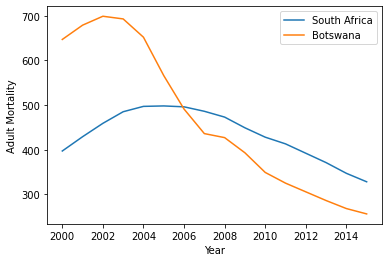

In [90]:
plt.plot(south_africa['Year'],south_africa['Adult Mortality'],label='South Africa')
plt.plot(botswana['Year'],botswana['Adult Mortality'],label='Botswana')
plt.xlabel('Year')
plt.ylabel('Adult Mortality')
plt.legend()
plt.show()

Perfect.

Now let us analyse the impact of <u>HIV/AIDS</u> on the life expectancy of these two countries.

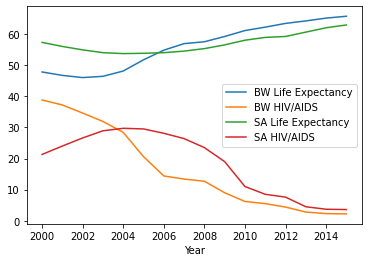

In [91]:
plt.subplot(1,1,1)
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.plot(botswana['Year'],botswana[' HIV/AIDS'],label='BW HIV/AIDS')
plt.xlabel('Year')
plt.legend()

plt.subplot(1,1,1)
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.plot(south_africa['Year'],south_africa[' HIV/AIDS'],label='SA HIV/AIDS')
plt.xlabel('Year')
plt.legend()

plt.show()

The years <b>2000-2004</b>.
It is very clear that as HIV/AIDS rose in the early years, life expectancy dicreased. Botswana's increased infections started sooner and had started to decrease as South Africa's increased.

As the number of people with HIV/AIDS decreased, life expectancy of the two countries increased. The graph depicts an inverse relationship between the impact of infection and the life expectancy of a country.

In [92]:
#correlation for south africa

south_africa['Life expectancy '].corr(south_africa[' HIV/AIDS'])

-0.968601613580889

In [93]:
#correlation for botswana

botswana['Life expectancy '].corr(botswana[' HIV/AIDS'])

-0.9742111259049707

The strong negative(inverse) correlation between life expectancy and HIV/AIDS for both coutries is confirmed above.

Next, we analyse the impact of <u>Diphtheria</u> on life expectancy.

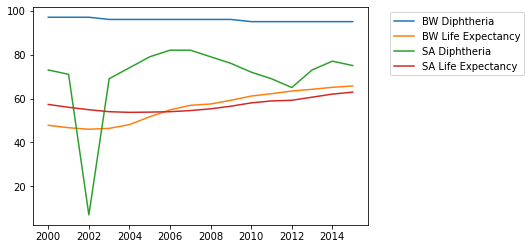

In [94]:
plt.subplot(1,1,1)
plt.plot(botswana['Year'],botswana['Diphtheria '],label='BW Diphtheria')
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.plot(south_africa['Year'],south_africa['Diphtheria '],label='SA Diphtheria')
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

Interpolate the missing entry in 2002 for South Africa.

In [95]:
south_africa['Diphtheria '][2406] = np.nan
south_africa['Diphtheria '].interpolate(method='linear',inplace=True)

<ipython-input-95-b7474bf2b363>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_africa['Diphtheria '][2406] = np.nan


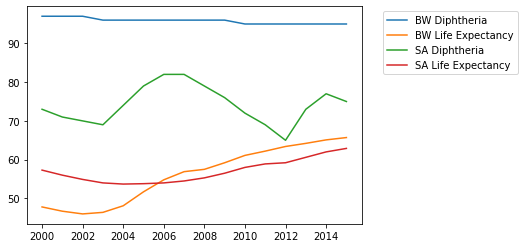

In [96]:
plt.subplot(1,1,1)
plt.plot(botswana['Year'],botswana['Diphtheria '],label='BW Diphtheria')
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.plot(south_africa['Year'],south_africa['Diphtheria '],label='SA Diphtheria')
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

Perfect.

In [97]:
#correlation for south africa

south_africa['Life expectancy '].corr(south_africa['Diphtheria '])

-0.2612455007679366

In [98]:
#correlation for south africa

botswana['Life expectancy '].corr(botswana['Diphtheria '])

-0.8864587907779251

Diphtheria seems to have little to no impact for either country. 
There is however, strong negative correlation between diptheria and life expecrancy in Botswana.
Although, that seems only superficial. We will henceforth, ignore it and leave it to the learning model to calculate its influence on life expectancy.

<u>Alcohol</u> plays a vital role on the health of a country, next we analyse its impact on life expectancy.

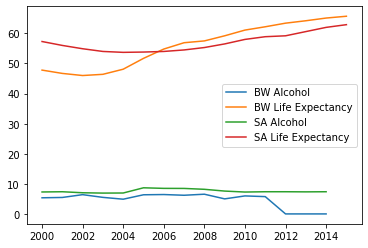

In [99]:
plt.subplot(1,1,1)
plt.plot(botswana['Year'],botswana['Alcohol'],label='BW Alcohol')
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.plot(south_africa['Year'],south_africa['Alcohol'],label='SA Alcohol')
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.legend()

The latest alcohol data for either country seem incomplete. We will set some values to NaN and then replace the values with the means of respective country's alcohol values.

In [100]:
botswana['Alcohol'][336],botswana['Alcohol'][337],botswana['Alcohol'][338],botswana['Alcohol'][339] = np.nan,np.nan,np.nan,np.nan
botswana['Alcohol'].fillna(botswana['Alcohol'].mean(),inplace=True)
south_africa['Alcohol'].fillna(south_africa['Alcohol'].mean(),inplace=True)

<ipython-input-100-2016323dd0c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  botswana['Alcohol'][336],botswana['Alcohol'][337],botswana['Alcohol'][338],botswana['Alcohol'][339] = np.nan,np.nan,np.nan,np.nan


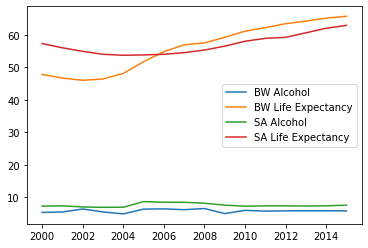

In [101]:
plt.subplot(1,1,1)
plt.plot(botswana['Year'],botswana['Alcohol'],label='BW Alcohol')
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.plot(south_africa['Year'],south_africa['Alcohol'],label='SA Alcohol')
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.legend()

The impact alcohol has on life expectancy seems neglegible. It is also unclear if this data is litres of consumption per capita or not.
But let us see if there is any correlation between alcohol and life expectancy.

In [102]:
south_africa['Life expectancy '].corr(south_africa['Alcohol'])

-0.2868432773889232

In [103]:
botswana['Life expectancy '].corr(botswana['Alcohol'])

0.1456796792731794

The numbers depict little linear correlation between the two and the impact is, as visualised, minimal.

Next we will analyse if there is any impact of HIV/AIDS infections on children.

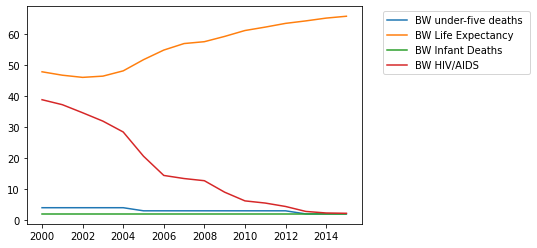

In [104]:
plt.subplot(1,1,1)
plt.plot(botswana['Year'],botswana['under-five deaths '],label='BW under-five deaths ')
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.plot(botswana['Year'],botswana['infant deaths'],label='BW Infant Deaths')
plt.plot(botswana['Year'],botswana[' HIV/AIDS'],label='BW HIV/AIDS')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

The impact of HIV/AIDS on deaths of children under 5 years is not insignificant, but also not very impactful either.
The number of deaths decreased as the HIV/AIDS infection decreased too. This can only mean that a high number of HIV/AIDS infections implies a high number of mother-child transmission too, in Botswana's case atleast.

Now we inspect South Africa.

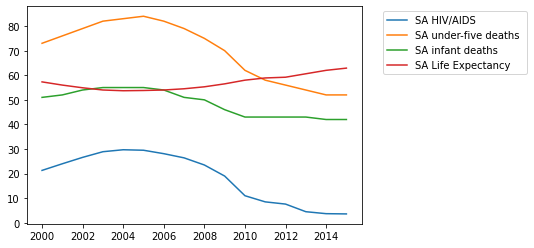

In [105]:
plt.plot(south_africa['Year'],south_africa[' HIV/AIDS'],label='SA HIV/AIDS')
plt.plot(south_africa['Year'],south_africa['under-five deaths '],label='SA under-five deaths ')
plt.plot(south_africa['Year'],south_africa['infant deaths'],label='SA infant deaths')
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

The relationship between HIV/AIDS infection and the deaths of chilren under the age of 5 could not be more pronounced.
The relationship between the three is curvelinear. Any explation would now be superflous.


The following analyses how impactful is <u>Hepatitis B</u> on life expectancy.

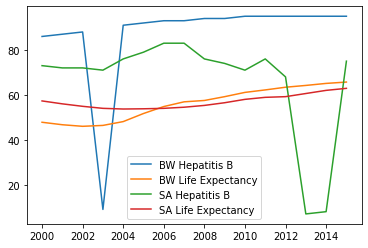

In [106]:
plt.subplot(1,1,1)
plt.plot(botswana['Year'],botswana['Hepatitis B'],label='BW Hepatitis B')
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.plot(south_africa['Year'],south_africa['Hepatitis B'],label='SA Hepatitis B')
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.legend()

It is very clear at this point that the data collection method or the capturing thereafter, for this dataset was subpar and our estimations will be imprecise and inaccurate compared to real world data from 2016 onwards. The latest life expectancy data is reflective of accurate, real life data and not interpolations through statistical means.

Nevertheless, the final results of our model will be very interesting, and as such, we will continue with our project.

In [107]:
botswana['Hepatitis B'][348] = np.nan
botswana['Hepatitis B'].interpolate(method='linear',inplace=True)
south_africa['Hepatitis B'][2394],south_africa['Hepatitis B'][2395] = np.nan,np.nan
south_africa['Hepatitis B'].fillna(south_africa['Hepatitis B'].mean(),inplace=True)

<ipython-input-107-95b5bbf6dafd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  botswana['Hepatitis B'][348] = np.nan
<ipython-input-107-95b5bbf6dafd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_africa['Hepatitis B'][2394],south_africa['Hepatitis B'][2395] = np.nan,np.nan


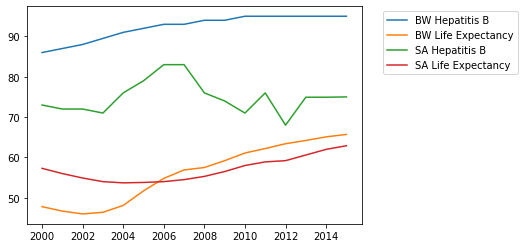

In [108]:
plt.subplot(1,1,1)
plt.plot(botswana['Year'],botswana['Hepatitis B'],label='BW Hepatitis B')
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.plot(south_africa['Year'],south_africa['Hepatitis B'],label='SA Hepatitis B')
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [109]:
botswana['Hepatitis B'].corr(botswana['Life expectancy '])

0.9134970037245819

The relationship between hepatitis b and life expectancy is surprising, at least to me. It seems the existence of other STIs such as hepatitis b are of little consequence and have a noticeable correlation with life expetancy, thi is true for either country.

<u>Income composition of resources</u> in Botswana and South Africa.

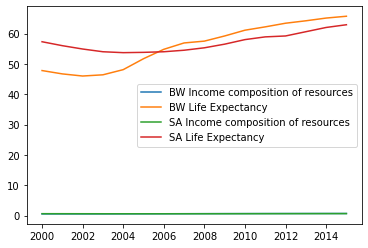

In [110]:
plt.subplot(1,1,1)
plt.plot(botswana['Year'],botswana['Income composition of resources'],label='BW Income composition of resources')
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.plot(south_africa['Year'],south_africa['Income composition of resources'],label='SA Income composition of resources')
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.legend()

Income composition of resources moves a higher from 2010 onwards, with increasing life expectancy.
The two factors have a strong linear correlation, even though large movements from life expectancy have no influence from income composition of resources. One of the early indicators of income composition of resources is <u>Education</u>, which we analyse below.

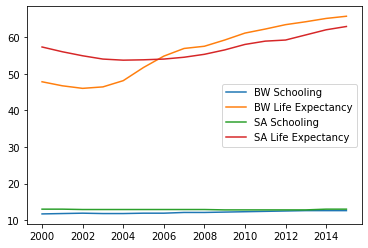

In [111]:
plt.subplot(1,1,1)
plt.plot(botswana['Year'],botswana['Schooling'],label='BW Schooling')
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.plot(south_africa['Year'],south_africa['Schooling'],label='SA Schooling')
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.legend()

In [112]:
botswana['Schooling'].corr(botswana['Life expectancy '])

0.9556033335777753

Schooling has little impact on life expectancy. This is a very strange thing to say. They have a strong positive linear correlation and although its effects cannot be depicted here, the impact of education has a multiplier effect on every component of life.

The impact of <u>BMI</u> and <u>Thinness</u> on life expectancy in Botswana and South Africa.

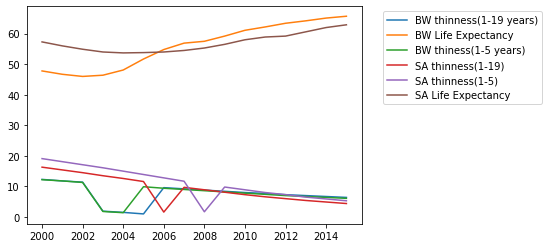

In [113]:
plt.subplot(1,1,1)
plt.plot(botswana['Year'],botswana[' thinness  1-19 years'],label='BW thinness(1-19 years)')
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.plot(botswana['Year'],botswana[' thinness 5-9 years'],label='BW thiness(1-5 years)')
plt.plot(south_africa['Year'],south_africa[' thinness  1-19 years'],label='SA thinness(1-19)')
plt.plot(south_africa['Year'],south_africa[' thinness 5-9 years'],label='SA thinness(1-5)')
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [114]:
botswana[' thinness  1-19 years'][346],botswana[' thinness  1-19 years'][347],botswana[' thinness  1-19 years'][348] = np.nan,np.nan,np.nan
botswana[' thinness 5-9 years'][347],botswana[' thinness 5-9 years'][348] = np.nan,np.nan
botswana[' thinness  1-19 years'].interpolate(method='linear',inplace=True)
botswana[' thinness 5-9 years'].interpolate(method='linear',inplace=True)

south_africa[' thinness  1-19 years'][2402] = np.nan
south_africa[' thinness 5-9 years'][2400] = np.nan
south_africa[' thinness  1-19 years'].interpolate(method='linear',inplace=True)
south_africa[' thinness 5-9 years'].interpolate(method='linear',inplace=True)

<ipython-input-114-8d49c36a7330>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  botswana[' thinness  1-19 years'][346],botswana[' thinness  1-19 years'][347],botswana[' thinness  1-19 years'][348] = np.nan,np.nan,np.nan
<ipython-input-114-8d49c36a7330>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  botswana[' thinness 5-9 years'][347],botswana[' thinness 5-9 years'][348] = np.nan,np.nan
<ipython-input-114-8d49c36a7330>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

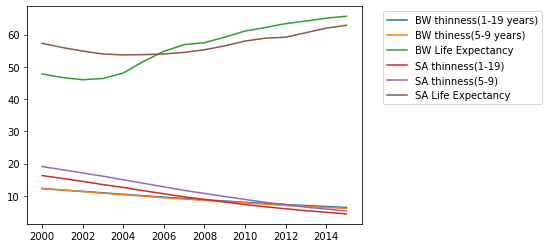

In [115]:
plt.subplot(1,1,1)
plt.plot(botswana['Year'],botswana[' thinness  1-19 years'],label='BW thinness(1-19 years)')
plt.plot(botswana['Year'],botswana[' thinness 5-9 years'],label='BW thiness(5-9 years)')
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.plot(south_africa['Year'],south_africa[' thinness  1-19 years'],label='SA thinness(1-19)')
plt.plot(south_africa['Year'],south_africa[' thinness 5-9 years'],label='SA thinness(5-9)')
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [116]:
botswana['Life expectancy '].corr(botswana[' thinness  1-19 years'])

-0.9771909311333772

In [117]:
botswana['Life expectancy '].corr(botswana[' thinness 5-9 years'])

-0.9776838746979076

In [118]:
south_africa[' thinness  1-19 years'].corr(south_africa['Life expectancy '])

-0.7297869128192792

In [119]:
south_africa[' thinness 5-9 years'].corr(south_africa['Life expectancy '])

-0.7437938786993533

The thinness in people young people, caused by weakened immune systems through HIV, has a strong negative correlation with life expectancy. Conversly, <u>BMI</u> has a strong positive correlation  with life expectancy, as depicted below.

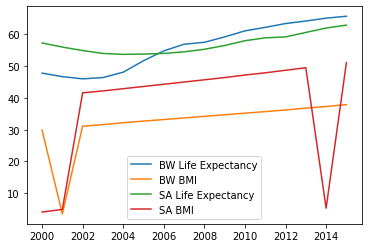

In [120]:
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.plot(botswana['Year'],botswana[' BMI '],label='BW BMI')
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.plot(south_africa['Year'],south_africa[' BMI '],label='SA BMI')
plt.legend()

In [121]:
botswana[' BMI '][350] = np.nan
south_africa[' BMI '][2407],south_africa[' BMI '][2408],south_africa[' BMI '][2394] = np.nan,np.nan,np.nan

botswana[' BMI '].interpolate(method='linear',inplace=True)
south_africa[' BMI '].interpolate(method='linear',inplace=True)

<ipython-input-121-e1d711fcb375>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  botswana[' BMI '][350] = np.nan
<ipython-input-121-e1d711fcb375>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_africa[' BMI '][2407],south_africa[' BMI '][2408],south_africa[' BMI '][2394] = np.nan,np.nan,np.nan


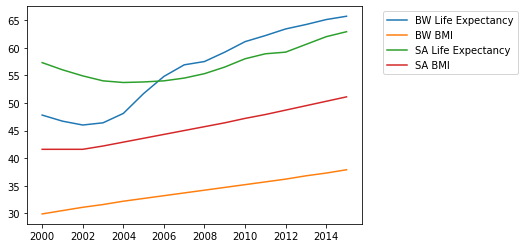

In [122]:
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.plot(botswana['Year'],botswana[' BMI '],label='BW BMI')
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.plot(south_africa['Year'],south_africa[' BMI '],label='SA BMI')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

It is unsurprising that a  weakened immune system, with a HIV/AIDS infection would shorten a person's life. But it was unexpected, to me at least, that BMI would have a positive correlation with life expectancy.

In the case of both countries, the average thinness had decreased and the BMI had to increase to get back to its normal levels before the HIV/AIDS pandemic.

Another factor that could impact life expectancy is the percentage of <u>polio vaccination<u/>

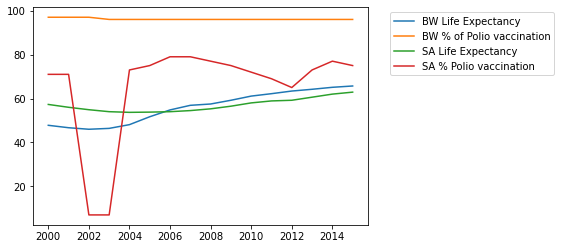

In [123]:
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.plot(botswana['Year'],botswana['Polio'],label='BW % of Polio vaccination')
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.plot(south_africa['Year'],south_africa['Polio'],label='SA % Polio vaccination')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [124]:
south_africa['Polio'][2405],south_africa['Polio'][2406] = np.nan,np.nan
south_africa['Polio'].fillna(south_africa['Polio'].mean(),inplace=True)

<ipython-input-124-84c3261a940a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_africa['Polio'][2405],south_africa['Polio'][2406] = np.nan,np.nan


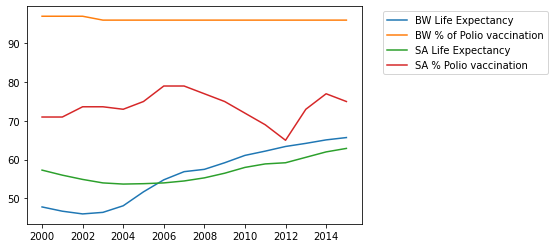

In [125]:
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.plot(botswana['Year'],botswana['Polio'],label='BW % of Polio vaccination')
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.plot(south_africa['Year'],south_africa['Polio'],label='SA % Polio vaccination')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [126]:
botswana['Polio'].corr(botswana['Life expectancy '])

-0.6242636499347132

In [127]:
south_africa['Polio'].corr(south_africa['Life expectancy '])

-0.26236294649631253

Botswana's polio vaccination percentage decreases in 2003, while life expectancy is stagnant and eventually increases. The decrease has made the two factors have noticeable negative correlation. The impact on life expectancy seems negligible.
With regards to South Africa, the large movements of the polio vaccination graph have little to no impact on life expectancy. We cannot draw any meaningful conclusion based on polio vaccination and its impact on life expectancy. 

It has no more meaningful impact than <u>Measles</u>, as we analyse underneath.

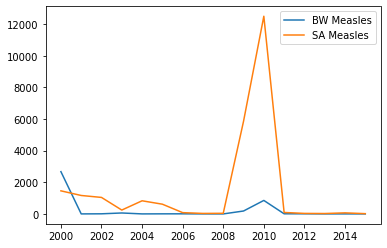

In [128]:
plt.plot(botswana['Year'],botswana['Measles '],label='BW Measles')
plt.plot(south_africa['Year'],south_africa['Measles '],label='SA Measles')
plt.legend()

In [129]:
botswana['Life expectancy '].corr(botswana['Measles '])

-0.23614770600013454

In [130]:
south_africa['Life expectancy '].corr(south_africa['Measles '])

0.014862246907576817

The measles outbreaks in the early 2000s and around 2010 has minimal impact on life expectancy, this is true for both countries, as substantiated by the correlation values of the two factors. We can draw no meaningful conclusion.

Let us analyse the impact all the factors we have looked at thus far have had on the <u>population</u> of both these coutries.

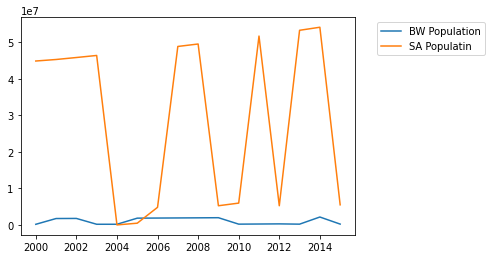

In [131]:
plt.plot(botswana['Year'],botswana['Population'],label='BW Population')
plt.plot(south_africa['Year'],south_africa['Population'],label='SA Populatin')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [132]:
for i,j,m in zip(botswana['Population'],south_africa['Population'],botswana['Year']):
    print(m,'\t',i,'\t',j)

2015 	 229197.0 	 5511976.68
2014 	 2168573.0 	 54146734.74
2013 	 212857.0 	 53311955.61
2012 	 289315.0 	 5256515.8
2011 	 251339.0 	 51729345.36
2010 	 214866.0 	 5979432.36
2009 	 1979882.0 	 5255813.11
2008 	 1946351.0 	 49557573.3
2007 	 1914414.0 	 48883844.99
2006 	 1884238.0 	 4823384.48
2005 	 1855852.0 	 476667.24
2004 	 182933.0 	 4717.99
2003 	 184339.0 	 46418193.9
2002 	 1779953.0 	 45855482.88
2001 	 1754935.0 	 45312937.0
2000 	 172834.0 	 44896856.0


This is misleading. Data capturing is subpar, at best. The first few number of the values in respective cells, although missing subsequent values, are indicative of the true population of the implied year. We will look at <a href="https://www.worldometers.info/world-population/southern-africa-population/">external</a> sources to make the corrections

In [133]:
bots_pop = [1643334,1674678,1704642,1734398,1765527,1799078,1835908,1875459,1915639,1953498,1987105,2015403,2039456,2062548,2088618,2120716]
sa_pop = [44967708,45571247,46150913,46719196,47291610,47880601,48489459,49119759,49779471,50477011,51216964,52003755,52832658,53687121,54544186,55386367]
bots_pop.reverse()
sa_pop.reverse()
botswana['Population'] = bots_pop
south_africa['Population'] = sa_pop

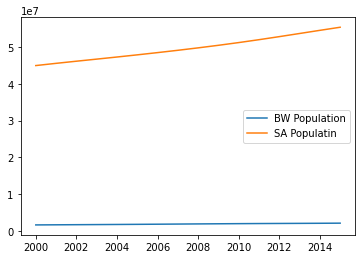

In [134]:
plt.plot(botswana['Year'],botswana['Population'],label='BW Population')
plt.plot(south_africa['Year'],south_africa['Population'],label='SA Populatin')
plt.legend()

It seems the populations were not heavily impacted by all the factors discussed, but our factor of interest, life expectancy is impacted, sometimes heavily.
Population of South Africa has no noticeable dents in its trajectory, neither does the population trajectory of Botswana.

Let us see the effect they have had on the <u>GDP</u> of either country.

In [135]:
for i,j,m in zip(botswana['GDP'],south_africa['GDP'],south_africa['Year']):
    print(m,'\t','BW: ',[i],'\t SA: ',[j])

2015 	 BW:  [6532.651] 	 SA:  [5769.77258]
2014 	 BW:  [7497.762376] 	 SA:  [6479.625659]
2013 	 BW:  [77.625783] 	 SA:  [6876.953821]
2012 	 BW:  [729.231453] 	 SA:  [7548.163698]
2011 	 BW:  [7645.21469] 	 SA:  [849.954224]
2010 	 BW:  [6346.15624] 	 SA:  [7362.76139]
2009 	 BW:  [5185.729845] 	 SA:  [5888.6284]
2008 	 BW:  [5623.379566] 	 SA:  [5786.59972]
2007 	 BW:  [5714.47937] 	 SA:  [6125.39984]
2006 	 BW:  [5374.554867] 	 SA:  [5631.73485]
2005 	 BW:  [5351.253732] 	 SA:  [5414.634326]
2004 	 BW:  [4896.583835] 	 SA:  [4863.51688]
2003 	 BW:  [4163.6596] 	 SA:  [3775.68275]
2002 	 BW:  [355.618382] 	 SA:  [2518.398261]
2001 	 BW:  [3128.97793] 	 SA:  [2681.781]
2000 	 BW:  [3349.68823] 	 SA:  [337.2253]


These data look like GDP per capita, not clear if adjusted for purchasing price parity.

Underneath is the visual analysis of the data.

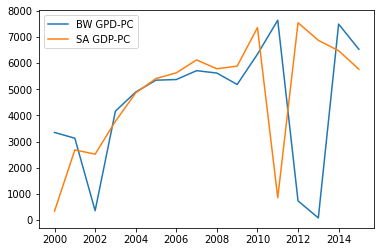

In [136]:
plt.plot(botswana['Year'],botswana['GDP'],label='BW GPD-PC')
plt.plot(south_africa['Year'],south_africa['GDP'],label='SA GDP-PC')
plt.legend()

The growth trend is realistic. Nevertheless, this column affected both countries in terms of reliability, and confidence in the data.
We will, once more, go to an <a href="https://data.worldbank.org/indicator/NY.GDP.PCAP.KD?end=2021&locations=BW-ZA&start=2000&view=chart&year_high_desc=false">external source</a>.

In [137]:
sa_gdppc = [6204.9,6252.3,6263.1,6195,6131,6018.2,5910.8,6074.9,5954.2,5708.8,5458.2,5233.9,5052.9,4953.7,4820.6,4735.7]
bw_gdppc = [5869.7,6291.2,6067.8,5566.5,5684.2,5428.2,5031.9,5982.5,5912.9,5700.1,5359.9,5219.3,5171.4,5030.1,4831.7,4917.1]
botswana['GDP'],south_africa['GDP'] = bw_gdppc,sa_gdppc

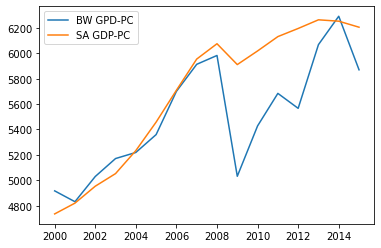

In [138]:
plt.plot(botswana['Year'],botswana['GDP'],label='BW GPD-PC')
plt.plot(south_africa['Year'],south_africa['GDP'],label='SA GDP-PC')
plt.legend()

The two graphs, this updated and the other one depicting incorrect data, are not very different from each other, the trends of economic downturn and improvement are similar.

The impact is insignificant and the only dents are around 2008, which are attributed to the 2008 financial crisis that affected world economies.

Botswana's sharp decrease in 2014 and increase from 2009 are dramatised, that is because it is a small economy and it is therefore vey sensitive to economic cycles from its larger neighbour South Africa and the world overall.

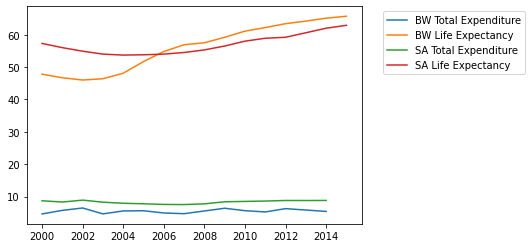

In [139]:
plt.plot(botswana['Year'],botswana['Total expenditure'],label='BW Total Expenditure')
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.plot(south_africa['Year'],south_africa['Total expenditure'],label='SA Total Expenditure')
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [140]:
botswana['Total expenditure'].fillna(botswana['Total expenditure'].mean(),inplace=True)
south_africa['Total expenditure'].fillna(south_africa['Total expenditure'].mean(),inplace=True)

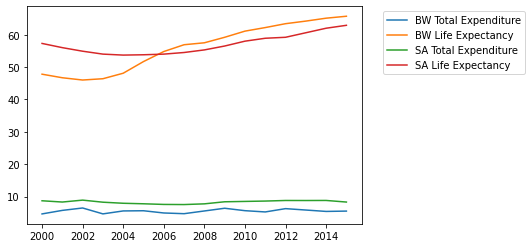

In [141]:
plt.plot(botswana['Year'],botswana['Total expenditure'],label='BW Total Expenditure')
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.plot(south_africa['Year'],south_africa['Total expenditure'],label='SA Total Expenditure')
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

It is unclear what this total expenditure column means in the context of the entire dataset.
Whether it is in billions or percentage of GDP, the figures are very unclear in either context. We will leave this untouched and focus on <u>percentage expenditure</u> which is equally vague.

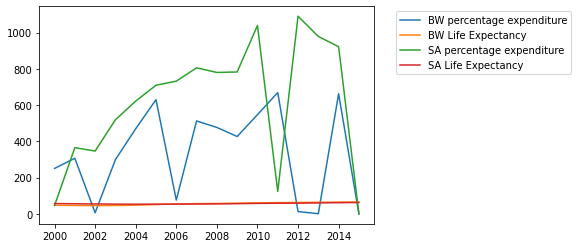

In [142]:
plt.plot(botswana['Year'],botswana['percentage expenditure'],label='BW percentage expenditure')
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.plot(south_africa['Year'],south_africa['percentage expenditure'],label='SA percentage expenditure')
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [143]:
for i,j,m in zip(botswana['Year'],botswana['percentage expenditure'],south_africa['percentage expenditure']):
    print(i,'\t',[j],'\t',[m])

2015 	 [0.0] 	 [0.0]
2014 	 [662.802194] 	 [922.0507313]
2013 	 [1.117811275] 	 [978.5905287]
2012 	 [12.83447357] 	 [1089.954838]
2011 	 [668.9562854] 	 [123.753335]
2010 	 [547.0386679] 	 [1038.885632]
2009 	 [426.7855662] 	 [782.5987144]
2008 	 [476.8625872] 	 [780.0336423]
2007 	 [512.5887995] 	 [805.490079]
2006 	 [76.31867911] 	 [732.1255305]
2005 	 [629.8425643] 	 [709.3170967]
2004 	 [469.5823898] 	 [622.043809]
2003 	 [299.3671252] 	 [519.1563781]
2002 	 [6.3300072] 	 [346.5316007]
2001 	 [306.9527349] 	 [365.2585722]
2000 	 [250.8916484] 	 [45.96380839]


In [144]:
bw_pe_ = botswana['percentage expenditure']
bw_pe_[349] = (bw_pe_[348]+bw_pe_[350])/2
bw_pe_[345] = (bw_pe_[344]+bw_pe_[346])/2
bw_pe_[339],bw_pe_[338] = (bw_pe_[337]+bw_pe_[340])/2,(bw_pe_[337]+bw_pe_[340])/2
bw_pe_[336] = np.nan
bw_pe_.fillna(bw_pe_.mean(),inplace=True)

sa_pe_ = south_africa['percentage expenditure']
sa_pe_[2397] = (sa_pe_[2396]+sa_pe_[2398])/2
sa_pe_[2393],sa_pe_[2408] = np.nan,np.nan
sa_pe_.interpolate(method='linear',inplace=True)

#interpolation is not adjusting this value, we will find the mean of the nearest 5 values and fill it
sa_pe_[2393] = 1018.780393

<ipython-input-144-9e1d7be495d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bw_pe_[349] = (bw_pe_[348]+bw_pe_[350])/2
<ipython-input-144-9e1d7be495d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bw_pe_[345] = (bw_pe_[344]+bw_pe_[346])/2
<ipython-input-144-9e1d7be495d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bw_pe_[339],bw_pe_[338] = (bw_pe_[337]+bw_pe_[340])/2,(bw_pe_[337]+bw_pe_[340])/2
<ipython-input-144-9e1d7be4

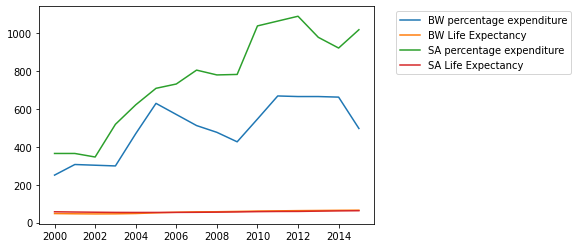

In [145]:
plt.plot(botswana['Year'],botswana['percentage expenditure'],label='BW percentage expenditure')
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.plot(south_africa['Year'],south_africa['percentage expenditure'],label='SA percentage expenditure')
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

Looking at the values from percentage expenditure and total expenditure,the feature names seem to be switched.

Analysis of the government expenditure and the impact of it on life expectancy

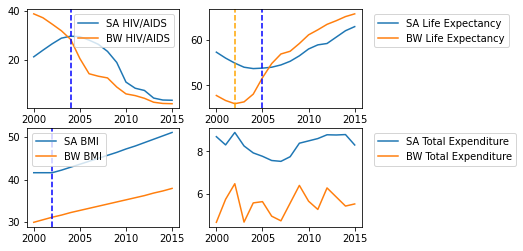

In [146]:
plt.subplot(2,2,1)
plt.plot(south_africa['Year'],south_africa[' HIV/AIDS'],label='SA HIV/AIDS')
plt.plot(botswana['Year'],botswana[' HIV/AIDS'],label='BW HIV/AIDS')
plt.axvline(x=2004, color='blue', linestyle='--')
plt.legend()

plt.subplot(2,2,2)
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.axvline(x=2005, color='blue', linestyle='--')
plt.axvline(x=2002, color='orange', linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


plt.subplot(2,2,3)
plt.plot(south_africa['Year'],south_africa[' BMI '],label='SA BMI')
plt.plot(botswana['Year'],botswana[' BMI '],label='BW BMI')
plt.axvline(x=2002,color='blue',ls='--')
plt.legend(loc='upper left')

plt.subplot(2,2,4)
plt.plot(south_africa['Year'],south_africa['Total expenditure'],label='SA Total Expenditure')
plt.plot(botswana['Year'],botswana['Total expenditure'],label='BW Total Expenditure')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

The decrease in infections had started for Botswana before the collection of this data started. 2004 was pivotal for South Africa, the year of inflection for HIV/AIDS infections and that caused life expectancy to reach a minimum and the gradual increase thereafter. Body mass index had reached its minima before 2002 and then began its linear increase as life expectancy increased as well, owing to the lowering HIV/AIDS infections. 

BMI as analysed before is on a linear increase, while life expectancy is quadric. 
The BMI graph is visually as second derivative of life expectancy. Total expenditure movement is inconsequential to our factor of interest, life expectancy.

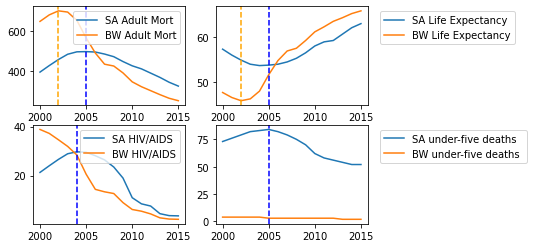

In [147]:
plt.subplot(2,2,1)
plt.plot(south_africa['Year'],south_africa['Adult Mortality'],label='SA Adult Mort')
plt.plot(botswana['Year'],botswana['Adult Mortality'],label='BW Adult Mort')
plt.axvline(x=2005, color='blue', linestyle='--')
plt.axvline(x=2002, color='orange', linestyle='--')
plt.legend(loc='upper right')

plt.subplot(2,2,2)
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.axvline(x=2005, color='blue', linestyle='--')
plt.axvline(x=2002, color='orange', linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(2,2,3)
plt.plot(south_africa['Year'],south_africa[' HIV/AIDS'],label='SA HIV/AIDS')
plt.plot(botswana['Year'],botswana[' HIV/AIDS'],label='BW HIV/AIDS')
plt.axvline(x=2004, color='blue', linestyle='--')
plt.legend()

plt.subplot(2,2,4)
plt.plot(south_africa['Year'],south_africa['under-five deaths '],label='SA under-five deaths ')
plt.plot(botswana['Year'],botswana['under-five deaths '],label='BW under-five deaths ')
plt.axvline(x=2005,color='blue',ls='--')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

The continual decrease in adult mortality and under-five deaths were caused by the decrease of HIV/AIDS infections. Statisticians are cautious to not deduce correlation as causation, but in this case it is undeniable that HIV/AIDS played a heavy role in influencing life expectancy and other factors that measure health, in this particular case, the deaths of adults and children under 5.

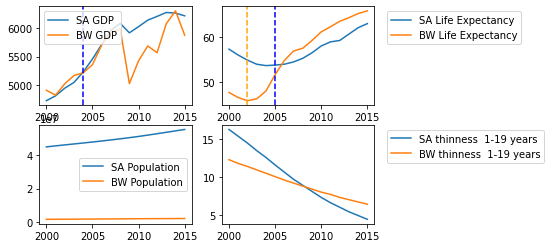

In [148]:
plt.subplot(2,2,1)
plt.plot(south_africa['Year'],south_africa['GDP'],label='SA GDP')
plt.plot(botswana['Year'],botswana['GDP'],label='BW GDP')
plt.axvline(x=2004, color='blue', linestyle='--')
plt.legend(loc='upper left')

plt.subplot(2,2,2)
plt.plot(south_africa['Year'],south_africa['Life expectancy '],label='SA Life Expectancy')
plt.plot(botswana['Year'],botswana['Life expectancy '],label='BW Life Expectancy')
plt.axvline(x=2005, color='blue', linestyle='--')
plt.axvline(x=2002, color='orange', linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(2,2,3)
plt.plot(south_africa['Year'],south_africa['Population'],label='SA Population')
plt.plot(botswana['Year'],botswana['Population'],label='BW Population')
plt.legend()

plt.subplot(2,2,4)
plt.plot(south_africa['Year'],south_africa[' thinness  1-19 years'],label='SA thinness  1-19 years')
plt.plot(botswana['Year'],botswana[' thinness  1-19 years'],label='BW thinness  1-19 years')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

The population of Botswana and South Africa, respectively, were generally not affected by the deaths of adults and children from HIV/AIDS infections. The thinness of young people had been increasing before the pandemic and that is due to the incrase in wealth of respective countries. It is difficult to deduce how much impact the HIV/AIDS pandemic had on thinness, but it is undeniable that the increase in wealth of both countries had a significant influence on the BMI and thinness of either country.

In [149]:
south_africa.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [150]:
botswana.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

Every feature is now adjusted accordingly. We will move onto our next phase, feature engineering.

# Model Building and Evaluation



<h3>Machine learning modeling for <u>Botswana.</u></h3>

Let us split the data.

In [151]:
from sklearn.model_selection import train_test_split
X_tr_b, X_ts_b,y_tr_b,y_ts_b = train_test_split(botswana,botswana['Life expectancy '],random_state=0)
X_tr_sa,X_ts_sa,y_tr_sa,y_ts_sa = train_test_split(south_africa,south_africa['Life expectancy '],random_state=0)

In [152]:
X_tr_b.drop(columns=['Life expectancy ','Status','Country'],inplace=True)
X_ts_b.drop(columns=['Life expectancy ','Status','Country'],inplace=True)

Train the linear regression model and then predict the values.

In [153]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_tr_b,y_tr_b)
y_pred_b = lr.predict(X_ts_b)

In [154]:
for i,j,y in zip(y_ts_b,y_pred_b,X_ts_b['Year']):
    print(y,':',i,'-',np.around(j,2),'=',np.around(i-j,2))

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_ts_b,y_pred_b)

2014 : 65.1 - 65.03 = 0.07
2009 : 59.2 - 59.19 = 0.01
2007 : 56.9 - 57.11 = -0.21
2006 : 54.8 - 54.74 = 0.06


0.08738590135932789

The model error is very low, i am pleased with the result.

In [155]:
from sklearn.metrics import r2_score
r2_score(y_ts_b,y_pred_b)

0.9991240394552912

99.912% is an exception score. This means that 99.9% the factors we have analysed, explain our life expectancy years. It begs the question how improved our model could be if the data collected was accurate and reliable.

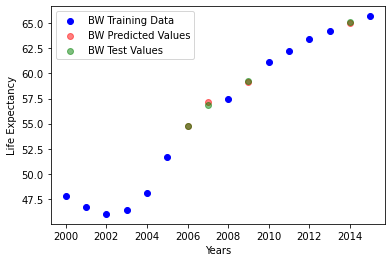

In [156]:
plt.scatter(X_tr_b['Year'],y_tr_b,label="BW Training Data",c='blue')
plt.scatter(X_ts_b['Year'],y_pred_b,label='BW Predicted Values',alpha=0.5,c='red')
plt.scatter(X_ts_b['Year'],y_ts_b,label='BW Test Values',alpha=0.5,c='green')
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.legend()

The model is very precise and let us scale and then use PCA to see if our model could improve.

In [157]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_tr_b)
X_tr_b_scaled = scaler.transform(X_tr_b)
X_ts_b_scaled = scaler.transform(X_ts_b)

In [158]:
lr.fit(X_tr_b_scaled,y_tr_b)
y_pred_b_scaled = lr.predict(X_ts_b_scaled)

In [159]:
for i,j,y in zip(y_ts_b,y_pred_b_scaled,X_ts_b['Year']):
    print(y,':',i,'-',np.around(j,2),'=',np.around(i-j,2))

2014 : 65.1 - 64.8 = 0.3
2009 : 59.2 - 60.92 = -1.72
2007 : 56.9 - 56.74 = 0.16
2006 : 54.8 - 54.27 = 0.53


In [160]:
r2_score(y_ts_b,y_pred_b_scaled)

0.943455871617658

In [161]:
mean_absolute_error(y_ts_b,y_pred_b_scaled)

0.6770440568727629

The perfomance is slightly worse after scaling, we cannot know how scaling could improve our predictions if we had data for many years. R^2 score has decreased by 5%, this would imply that there is still  5% of input features that we have not captured that could explain our model. The score might be lower, but I now have more confidence in our model performance after we scaled the data than I would otherwise. Let's see if choosing fewer components to input would help the perfomance.

In [162]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X_tr_b_scaled)
X_tr_b_pca = pca.transform(X_tr_b_scaled)
X_ts_b_pca = pca.transform(X_ts_b_scaled)

In [163]:
lr.fit(X_tr_b_pca,y_tr_b)
y_pred_b_pca = lr.predict(X_ts_b_pca)

In [164]:
for i,j,y in zip(y_ts_b,y_pred_b_pca,X_ts_b['Year']):
    print(y,':',i,'-',np.around(j,2),'=',np.around(i-j,2))

2014 : 65.1 - 65.86 = -0.76
2009 : 59.2 - 57.82 = 1.38
2007 : 56.9 - 55.65 = 1.25
2006 : 54.8 - 53.81 = 0.99


In [166]:
mean_absolute_error(y_ts_b,y_pred_b_pca)

1.09660268019557

In [167]:
r2_score(y_ts_b,y_pred_b_pca)

0.9149967291064462

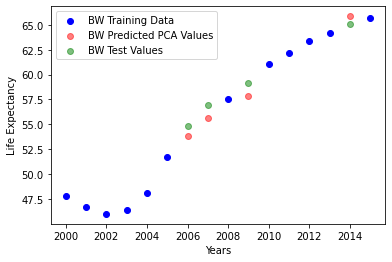

In [168]:
plt.scatter(X_tr_b['Year'],y_tr_b,label="BW Training Data",c='blue')
plt.scatter(X_ts_b['Year'],y_pred_b_pca,label='BW Predicted PCA Values',alpha=0.5,c='red')
plt.scatter(X_ts_b['Year'],y_ts_b,label='BW Test Values',alpha=0.5,c='green')
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.legend()

The predictive performance of our model is even worse and R^2 score is even lower. I would need to test the model with more unknown data, which I do not have at the moment. Deploying the model will help with the confidence we would have in the model to minimise error and raise R^2.

<h3>Machine learning modeling for <u>South Africa.</u></h3>

If our model maintains the same performance with South Africa, it would have my confidence.

In [169]:
X_tr_sa.drop(columns=['Life expectancy ','Status','Country'],inplace=True)
X_ts_sa.drop(columns=['Life expectancy ','Status','Country'],inplace=True)

In [170]:
lr.fit(X_tr_sa,y_tr_sa)
y_pred_sa = lr.predict(X_ts_sa)

In [171]:
for i,j,y in zip(y_ts_sa,y_pred_sa,X_ts_sa['Year']):
    print(y,':',i,'-',np.around(j,2),'=',np.around(i-j,2))

2014 : 62.0 - 61.82 = 0.18
2009 : 56.5 - 56.72 = -0.22
2007 : 54.5 - 55.26 = -0.76
2006 : 54.0 - 54.45 = -0.45


In [172]:
mean_absolute_error(y_ts_sa,y_pred_sa)

0.402881936696339

In [173]:
r2_score(y_ts_sa,y_pred_sa)

0.9786105382624396

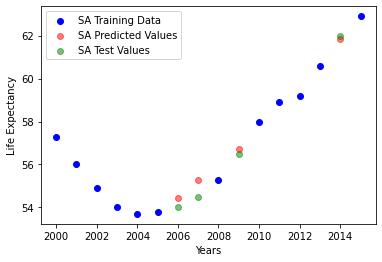

In [174]:
plt.scatter(X_tr_sa['Year'],y_tr_sa,label="SA Training Data",c='blue')
plt.scatter(X_ts_sa['Year'],y_pred_sa,label='SA Predicted Values',alpha=0.5,c='red')
plt.scatter(X_ts_sa['Year'],y_ts_sa,label='SA Test Values',alpha=0.5,c='green')
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.legend()

A very high R^2 score, and minimal mean error. Let us scale our data and then use PCA and see if the same derioration in performance continues.

In [176]:
scaler.fit(X_tr_sa)
X_tr_sa_scaled = scaler.transform(X_tr_sa)
X_ts_sa_scaled = scaler.transform(X_ts_sa)

In [177]:
lr.fit(X_tr_sa_scaled,y_tr_sa)
y_pred_sa_scaled = lr.predict(X_ts_sa_scaled)

In [178]:
mean_absolute_error(y_ts_sa,y_pred_sa_scaled)

0.37060072656554155

In [180]:
r2_score(y_ts_sa,y_pred_sa_scaled)

0.9840065013928816

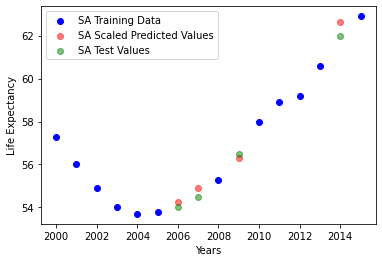

In [181]:
plt.scatter(X_tr_sa['Year'],y_tr_sa,label="SA Training Data",c='blue')
plt.scatter(X_ts_sa['Year'],y_pred_sa_scaled,label='SA Scaled Predicted Values',alpha=0.5,c='red')
plt.scatter(X_ts_sa['Year'],y_ts_sa,label='SA Test Values',alpha=0.5,c='green')
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.legend()

The predictive performance of the model has improved, so has R^2. This has raised my confidence that the model would work well with unknown data, let us choose few features and see if the performance improves.

In [182]:
pca.fit(X_tr_sa_scaled)
X_tr_sa_pca = pca.transform(X_tr_sa_scaled)
X_ts_sa_pca = pca.transform(X_ts_sa_scaled)

In [186]:
lr.fit(X_tr_sa_pca,y_tr_sa)
y_pred_sa_pca = lr.predict(X_ts_sa_pca)

In [188]:
mean_absolute_error(y_ts_sa,y_pred_sa_pca)

0.2586178990167056

In [189]:
r2_score(y_ts_sa,y_pred_sa_pca)

0.9839797843415519

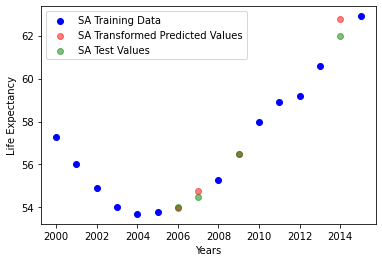

In [190]:
plt.scatter(X_tr_sa['Year'],y_tr_sa,label="SA Training Data",c='blue')
plt.scatter(X_ts_sa['Year'],y_pred_sa_pca,label='SA Transformed Predicted Values',alpha=0.5,c='red')
plt.scatter(X_ts_sa['Year'],y_ts_sa,label='SA Test Values',alpha=0.5,c='green')
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.legend()

The model's predictive performance improved some more after using few features, however, R^2 decreased by 0.0027%, it is negligible. I have absolute confidence that this model would work very well in the real world, with new unseen data.
I apologise for any spelling errors made, and this marks the end of this project.

Kind regards,
MSL.